In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [68]:
df.describe(include = 'all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [53]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [54]:
out = df['Scores'].values.reshape(-1,1)
inp = df['Hours'].values.reshape(-1,1)

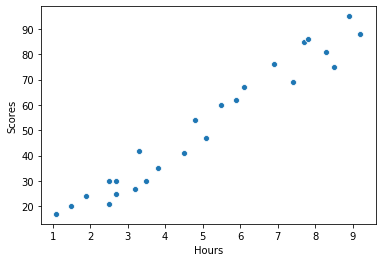

In [80]:
sns.scatterplot(df['Hours'], df['Scores'])

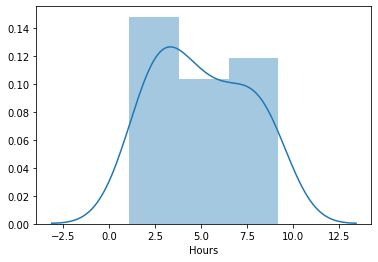

In [89]:
sns.distplot(df['Hours'])

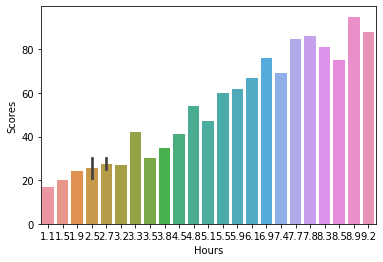

In [78]:
sns.barplot(df['Hours'], df['Scores'])

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inp, out, test_size = 0.05)

In [61]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
reg_pred = reg.predict(x_test)

reg_acc = reg.score(inp, out)
print('Accuracy Score: ',reg_acc.round(4)*100,'%')

Accuracy Score:  95.28 %


In [57]:
# Predication for the hours of 9.25
p = 9.25
prdt = np.array(p).reshape(1,-1)
pred_score = reg.predict(prdt).round(2)
print('Predicted Score is: ', pred_score[0][0])


Predicted Score is:  92.28


# Standardized Regression

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)
y_test_s = scaler.transform(y_test)
y_train_s = scaler.transform(y_train)

In [67]:
# Standard Scaled Linear Regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train_s, y_train_s)
reg_pred = reg.predict(x_test_s)

reg_acc = reg.score(scaler.transform(inp), scaler.transform(out))
print(f'Standard Scaled Accuracy Score: {reg_acc.round(4)*100} %')

Standard Scaled Accuracy Score: 95.28 %


In [60]:
# Predication(Scaled) for the hours of 9.25
p1 = 9.25
p_s = np.array(p1).reshape(1,-1)
prdt_s = scaler.transform(p_s) 
ps_s = reg.predict(prdt_s)
pred_score_s = scaler.inverse_transform(ps_s)
print('Standard Scaled Predicted Score is: ', pred_score_s[0][0].round(2))


Predicted Score is:  92.28
